# Network analysis

In [10]:
#Import the used packages
%matplotlib inline
import networkx as nx
import pickle
import io
import re
import operator
from matplotlib import pyplot
import numpy as np
import community
import matplotlib.pyplot as plt
import pylab

In [11]:
#Load directed graph, undirected graph and the list of charater names, character urls and character ID's.
dg = nx.read_gpickle("Digraph_GOT.gpickle")
udg = nx.read_gpickle("Udigraph_GOT.gpickle")
charnamesopen= open('char_names.txt', 'r')
namelist=charnamesopen.read().splitlines()
charnamesopen.close()
urlnamesopen= open('url_names.txt', 'r')
urlnames=urlnamesopen.read().splitlines()
urlnamesopen.close()
idsopen= open('id_list.txt', 'r')
idlist=idsopen.read().splitlines()
idsopen.close()

#Generate the largest connected component. This is used in the rest.
subdg = list(nx.weakly_connected_component_subgraphs(dg))
subudg=list(nx.connected_component_subgraphs(udg))
dg=subdg[0]
udg=subudg[0]

In [12]:
#Show a subset of the three loaded lists
print namelist[:10]
print urlnames[:10]
print idlist[:10]

['Aemma Arryn', 'Aemon', 'Aemond Targaryen', 'Aggar', 'Aggo', 'Akho', 'Allo', 'Amaya', 'Anara', 'Andros']
['Aemma_Arryn', 'Aemon', 'Aemond_Targaryen', 'Aggar', 'Aggo', 'Akho', 'Allo', 'Amaya', 'Anara', 'Andros']
['49600', '2206', '30718', '10245', '6660', '39242', '21870', '36172', '29843', '30956']


In [13]:
print "The number of edges in the graph is %d" % dg.number_of_edges()
print "The number of nodes in the graph is %d" % dg.number_of_nodes()
print "The number of edges in the graph is %d" % udg.number_of_edges()
print "The number of nodes in the graph is %d" % udg.number_of_nodes()

The number of edges in the graph is 9159
The number of nodes in the graph is 1013
The number of edges in the graph is 6756
The number of nodes in the graph is 1013


## Draw graphs

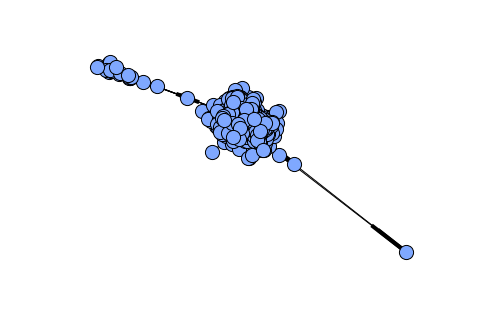

In [14]:
nx.draw_spring(dg, node_size=200, with_labels=False, node_color='#7FA8FF',k=1000)
#Save the graph as an image
#pylab.savefig('figures/Directed_graph.png')
plt.show()

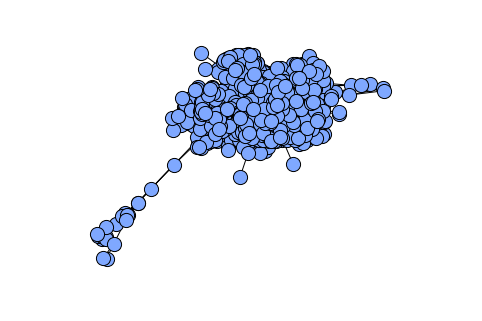

In [15]:
nx.draw_spring(udg, node_size=200, with_labels=False, node_color='#7FA8FF')
#Save the graph as an image
#pylab.savefig('figures/Undirected_graph.png')
plt.show()

# Degree analysis

In [17]:
#In and out degree
Indegree=sorted(dg.in_degree().items(), key=operator.itemgetter(1),reverse=True)
Outdegree=sorted(dg.out_degree().items(), key=operator.itemgetter(1),reverse=True)

print "The 10 characters with the highest In degree"
for i in range(10):
    print Indegree[i]
print
print "The 10 characters with the highest Out degree"   
for i in range(10):
    print Outdegree[i]

The 10 characters with the highest In degree
(u'Tyrion Lannister', 200)
(u'Jon Snow', 177)
(u'Daenerys Targaryen', 167)
(u'Robb Stark', 152)
(u'Eddard Stark', 150)
(u'Jaime Lannister', 149)
(u'Sansa Stark', 137)
(u'Stannis Baratheon', 131)
(u'Cersei Lannister', 129)
(u'Tywin Lannister', 127)

The 10 characters with the highest Out degree
(u'Tyrion Lannister', 86)
(u'Jon Snow', 84)
(u'Arya Stark', 75)
(u'Sandbox/Jon Snow (Updated)', 73)
(u'Jaime Lannister', 69)
(u'Sansa Stark', 67)
(u'Daenerys Targaryen', 67)
(u'Robb Stark', 66)
(u'Cersei Lannister', 58)
(u'Ramsay Bolton', 58)


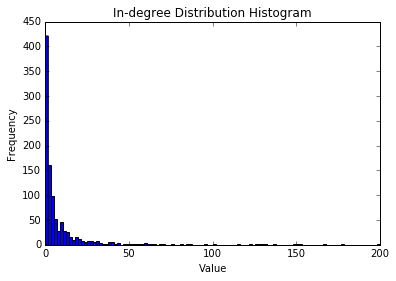

In [18]:
#Get the sequence of the In-degree
degree_sequence_in=dg.in_degree().values()
dmax_in=max(degree_sequence_in)
dmin_in=min(degree_sequence_in)
#Create the histogram and plot it
hist_in, bins_in = np.histogram(degree_sequence_in, bins=range(dmin_in,dmax_in+1))
plt.hist(degree_sequence_in, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("In-degree Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
#Save the graph as an image
#pylab.savefig('figures/Indegree_hist.png')
plt.show()

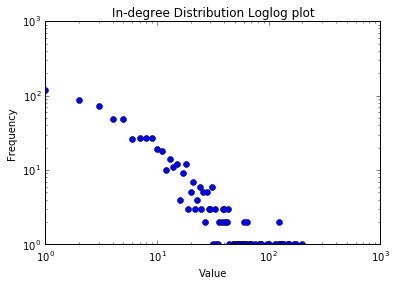

In [19]:
#Create the loglog plot and plot it
pyplot.plot(bins_in[0:len(bins_in)-1],hist_in,'o')
plt.xlabel("Value")
plt.ylabel("Frequency")
pyplot.title('In-degree Distribution Loglog plot')
pyplot.xscale('log')
pyplot.yscale('log')
#Save the graph as an image
#pylab.savefig('figures/Indegree_loglog.png')
pyplot.show()

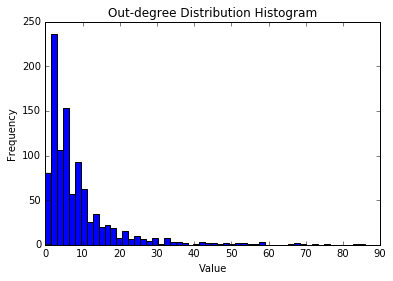

In [20]:
#Get the sequence of the Out-degree
degree_sequence_out=dg.out_degree().values()
dmax_out=max(degree_sequence_out)
dmin_out=min(degree_sequence_out)

#Create the histogram and plot it
hist_out, bins_out = np.histogram(degree_sequence_out, bins=range(dmin_out,dmax_out+1))
plt.hist(degree_sequence_out, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Out-degree Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
#Save the graph as an image
#pylab.savefig('figures/Outdegree_hist.png')
plt.show()

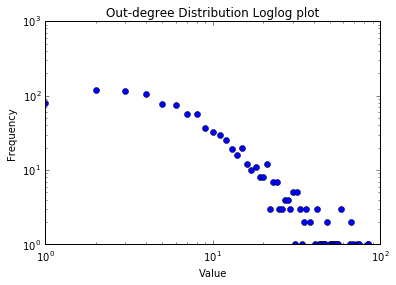

In [21]:
#Create the loglog plot and plot it
pyplot.plot(bins_out[0:len(bins_out)-1],hist_out,'o')
plt.xlabel("Value")
plt.ylabel("Frequency")
pyplot.title('Out-degree Distribution Loglog plot')
pyplot.xscale('log')
pyplot.yscale('log')
#Save the graph as an image
#pylab.savefig('figures/Outdegree_loglog.png')
pyplot.show()

# Communities and modularity

In [22]:
#Calculate modularity with "community"
partition = community.best_partition(udg)
M=community.modularity(partition,udg)
print M

0.505376621128


In [23]:
#Create of list of lists where all the inner lists represent a community
#and the names in a given list is a member of that community
names=partition.keys()
comlist=[]
for P in range(max(partition.values())+1):
    comlist.append([])
for i in range(len(names)):
    com=partition[names[i]]
    comlist[com].append(names[i])

## Manual communities

Create some new communities. This time a community is a house. It can also be a person or another party. As long as someone has sworn allegiance to them. We thus use the "Allegiance" part of the wiki page to do this.
We use regular expressions to do this. The expressions are well tested to make sure we get what we want.

In [25]:
for p in range(len(udg.nodes())):
    name=udg.nodes()[p]
    #Open a character page.
    filename="char_pages/%s.txt" % name.replace("/", "_")
    f = io.open(filename,'r',encoding='utf-8')
    readfile=f.read()
    #Find the status (dead,alive) of the p'th character
    regexname=r'(?<=Status:_)(.*?)(?=\")'
    match=re.search(regexname, readfile)
    #Find Allegiance eg. house of the p'th character 
    regexname1=r'(?<=Allegiance)([\w\W\s]*?)(?=</div>)'
    match1=re.search(regexname1, readfile)
    
    #If the character has a specified status add it, else add "Not available".
    #Do it for both the directed and undirected graph
    if match:
        dg.node[name]['Status']=match.group()
        udg.node[name]['Status']=match.group()

    else:
        dg.node[name]['Status']="Not available"
        udg.node[name]['Status']="Not available"
     
    #Add the house as an attribute. Add "Not availbale" if there is no allegiance.
    if match1:
        #The string that contains allegiance needs to be further cleaned to get the right allegiances.
        cleanedstring=re.sub('(?<=<small>)([\w\W\s]*?)(?=</small>)', '', match1.group())
        houselist=re.findall(r'title="(.*?)"', cleanedstring)
        if houselist:
            dg.node[name]['House']=houselist
            udg.node[name]['House']=houselist
        else:
            dg.node[name]['House']=["Not available"]
            udg.node[name]['House']=["Not available"]
    else:
        dg.node[name]['House']=["Not available"]
        udg.node[name]['House']=["Not available"]
        

In [41]:
#Save the graphs with attributes
#nx.write_gpickle(dg, "Digraph_GOT_with_attributes.gpickle")
#nx.write_gpickle(udg, "Udigraph_GOT_with_attributes.gpickle")

In [42]:
#How the graph nodes look with attributes
print udg.nodes(data=True)[0:3]

[(u'Joffrey Baratheon', {'Status': u'Dead', 'House': [u"House Baratheon of King's Landing", u'House Lannister']}), (u'Benjen Stark', {'Status': u'Alive', 'House': [u'House Stark', u'Three-eyed raven', u"Night's Watch"]}), (u'Leaf', {'Status': u'Dead', 'House': [u'Three-eyed Raven', u'Children of the Forest']})]


In [43]:
#How to get attributes for a given character
print nx.get_node_attributes(udg,"Status")['Leaf']
print nx.get_node_attributes(udg,"House")['Leaf']

Dead
[u'Three-eyed Raven', u'Children of the Forest']


In [44]:
#Create of list of lists where all the inner lists represent a community
#and the names in a given list is a member of that community
Houses=[]
allhouses=nx.get_node_attributes(udg,"House").values()
unique_houses = list(set(x for l in allhouses for x in l))
house_com=[]
for i in range(len(unique_houses)):
    house_com.append([])
for p in range(len(udg.nodes())):
    name=udg.nodes()[p]
    house=nx.get_node_attributes(udg,"House")[name]
    for item in house:
        index=unique_houses.index(item)
        house_com[index].append(name)

In [45]:
print len(house_com)

213


## Compare the manual communities with the communities from the community package

A confusion matrix is created. This is 213x10. If a character is in both the community corresponding to the row and the community corresponding to the column, then a 1 is added. Thus the numbers represent how many characters the communities have in common.

In [58]:
D=np.zeros((len(unique_houses),max(partition.values())+1))
for i in range(D.shape[0]):
    for p in range(D.shape[1]):
        D[i,p]=len(set(house_com[i]) & set(comlist[p]))
print D[0:100]

[[ 41.  19.  13.   9.  37.  27.   3.   0.   7.   1.]
 [  0.   0.   0.   0.   0.   2.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  3.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   6.   0.   0.   0.   0.]
 [  8.   0.   0.   0.   0.   0.   0.   0.   2.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   2.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   2.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.

## Modularity of house communities

In [47]:
#Modularity according to (9.12) in the book.
Lc=[]
Kc=[]

for i in range(len(house_com)):
    Lctemp=0
    Kctemp=0
    numi=0
    for t in range(len(house_com[i])):
        Kctemp+=udg.degree(house_com[i][t])
        p=t
        while numi<=p<len(house_com[i]):
            Lctemp+=udg.number_of_edges(house_com[i][t],house_com[i][p])
            p+=1
        numi+=1
    Lc.append(Lctemp)
    Kc.append(Kctemp)

In [48]:
print Lc[:10]
print Kc[:10]

[79, 1, 0, 0, 3, 0, 13, 14, 0, 0]
[1008, 16, 11, 11, 62, 4, 62, 116, 1, 2]


In [49]:
#Find Modularity
from __future__ import division
L=udg.number_of_edges()
M=0
for i in range(len(house_com)):
    M+=float(Lc[i])/L-(float(Kc[i])/(2*L))**2
print M

0.310799682566


# Centrality

In [28]:
bc=nx.betweenness_centrality(dg)
print "Betweenness centrality top 10:"
sorted_bc = sorted(bc.items(), key=operator.itemgetter(1),reverse=True)
for i in range(10):
    print sorted_bc[i]

Betweenness centrality top 10:
(u'Jon Snow', 0.08724008485624618)
(u'Tyrion Lannister', 0.08450892130431348)
(u'Daenerys Targaryen', 0.07856808394051866)
(u'Arya Stark', 0.053640019757323916)
(u'Robb Stark', 0.0347520817662068)
(u'Morag Umber', 0.03310618766688951)
(u'Jaime Lannister', 0.03012864245806082)
(u'Stannis Baratheon', 0.02966924727271545)
(u'Ramsay Bolton', 0.02966857930732238)
(u'Eddard Stark', 0.02608324045165105)


In [19]:
# For in-edges
ecin=nx.eigenvector_centrality(dg)
print "Eigenvector centrality - in degree - top 5:"
sorted_ecin = sorted(ecin.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print sorted_ecin[i]
    
print
print "Eigenvector centrality - out degree - top 5:"
# For out-edges
ecout=nx.eigenvector_centrality(dg.reverse())

sorted_ecout = sorted(ecout.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print sorted_ecout[i]

Eigenvector centrality - in degree - top 5:
(u'Tyrion Lannister', 0.2215381812777757)
(u'Eddard Stark', 0.2150755304728512)
(u'Cersei Lannister', 0.20638248774952886)
(u'Sansa Stark', 0.2026248303884088)
(u'Jaime Lannister', 0.2007695021933647)

Eigenvector centrality - out degree - top 5:
(u'Tyrion Lannister', 0.17362438879493972)
(u'Jaime Lannister', 0.1605921613052343)
(u'Sansa Stark', 0.15751761637148953)
(u'Jon Snow', 0.15741456147832655)
(u'Robb Stark', 0.15528618523307344)
